In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Load datasets
train_df = pd.read_csv('cleaned_train.csv')
test_df = pd.read_csv('cleaned_test.csv')

# Calculate necessary features
current_year = 2024  # Adjust this to the current year
train_df['BILL_PREM_DIFF'] = train_df['POL_ANNL_TTL_BILL_PREM_AMT'] - train_df['AVG_TERM_PREM']
test_df['BILL_PREM_DIFF'] = test_df['POL_ANNL_TTL_BILL_PREM_AMT'] - test_df['AVG_TERM_PREM']

train_df['VEHICLE_AGE'] = current_year - train_df['NEW_VEH_MODEL_YR']
test_df['VEHICLE_AGE'] = current_year - test_df['NEW_VEH_MODEL_YR']


In [38]:
# Prepare the feature set for segmentation
features_for_segmentation = train_df[['BILL_PREM_DIFF', 'VEHICLE_AGE', 'STATE_ABBR', 'YEARS_WITH_HIG']]

# Convert categorical variable to numeric
features_for_segmentation = pd.get_dummies(features_for_segmentation, columns=['STATE_ABBR'])

# Perform KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=42)
train_df['SEGMENT'] = kmeans.fit_predict(features_for_segmentation)

# Add the segment labels to the test set
test_features_for_segmentation = test_df[['BILL_PREM_DIFF', 'VEHICLE_AGE', 'STATE_ABBR', 'YEARS_WITH_HIG']]
test_features_for_segmentation = pd.get_dummies(test_features_for_segmentation, columns=['STATE_ABBR'])
test_df['SEGMENT'] = kmeans.predict(test_features_for_segmentation)


In [39]:
# Summarize key variables for each segment
segment_summary = train_df.groupby('SEGMENT').agg({
    'BILL_PREM_DIFF': 'mean',
    'VEHICLE_AGE': 'mean',
    'YEARS_WITH_HIG': 'mean'
}).reset_index()

# Add segment sizes
segment_sizes = train_df['SEGMENT'].value_counts().reset_index()
segment_sizes.columns = ['SEGMENT', 'SIZE']
segment_summary = segment_summary.merge(segment_sizes, on='SEGMENT')
segment_summary['BILL_PREM_DIFF'] = round(segment_summary['BILL_PREM_DIFF'], 2)
segment_summary['VEHICLE_AGE'] = round(segment_summary['VEHICLE_AGE'], 0)
segment_summary['YEARS_WITH_HIG'] = round(segment_summary['YEARS_WITH_HIG'], 0)
segment_summary['YEARS_WITH_HIG'] = round(segment_summary['YEARS_WITH_HIG'], 0)

# Print segment summaries
print(segment_summary)


   SEGMENT  BILL_PREM_DIFF  VEHICLE_AGE  YEARS_WITH_HIG    SIZE
0        0         1039.88         10.0             8.0  112162
1        1           64.36         13.0             6.0  107365
2        2         5077.12          6.0            10.0    5806
3        3         2292.55          7.0             9.0   39629


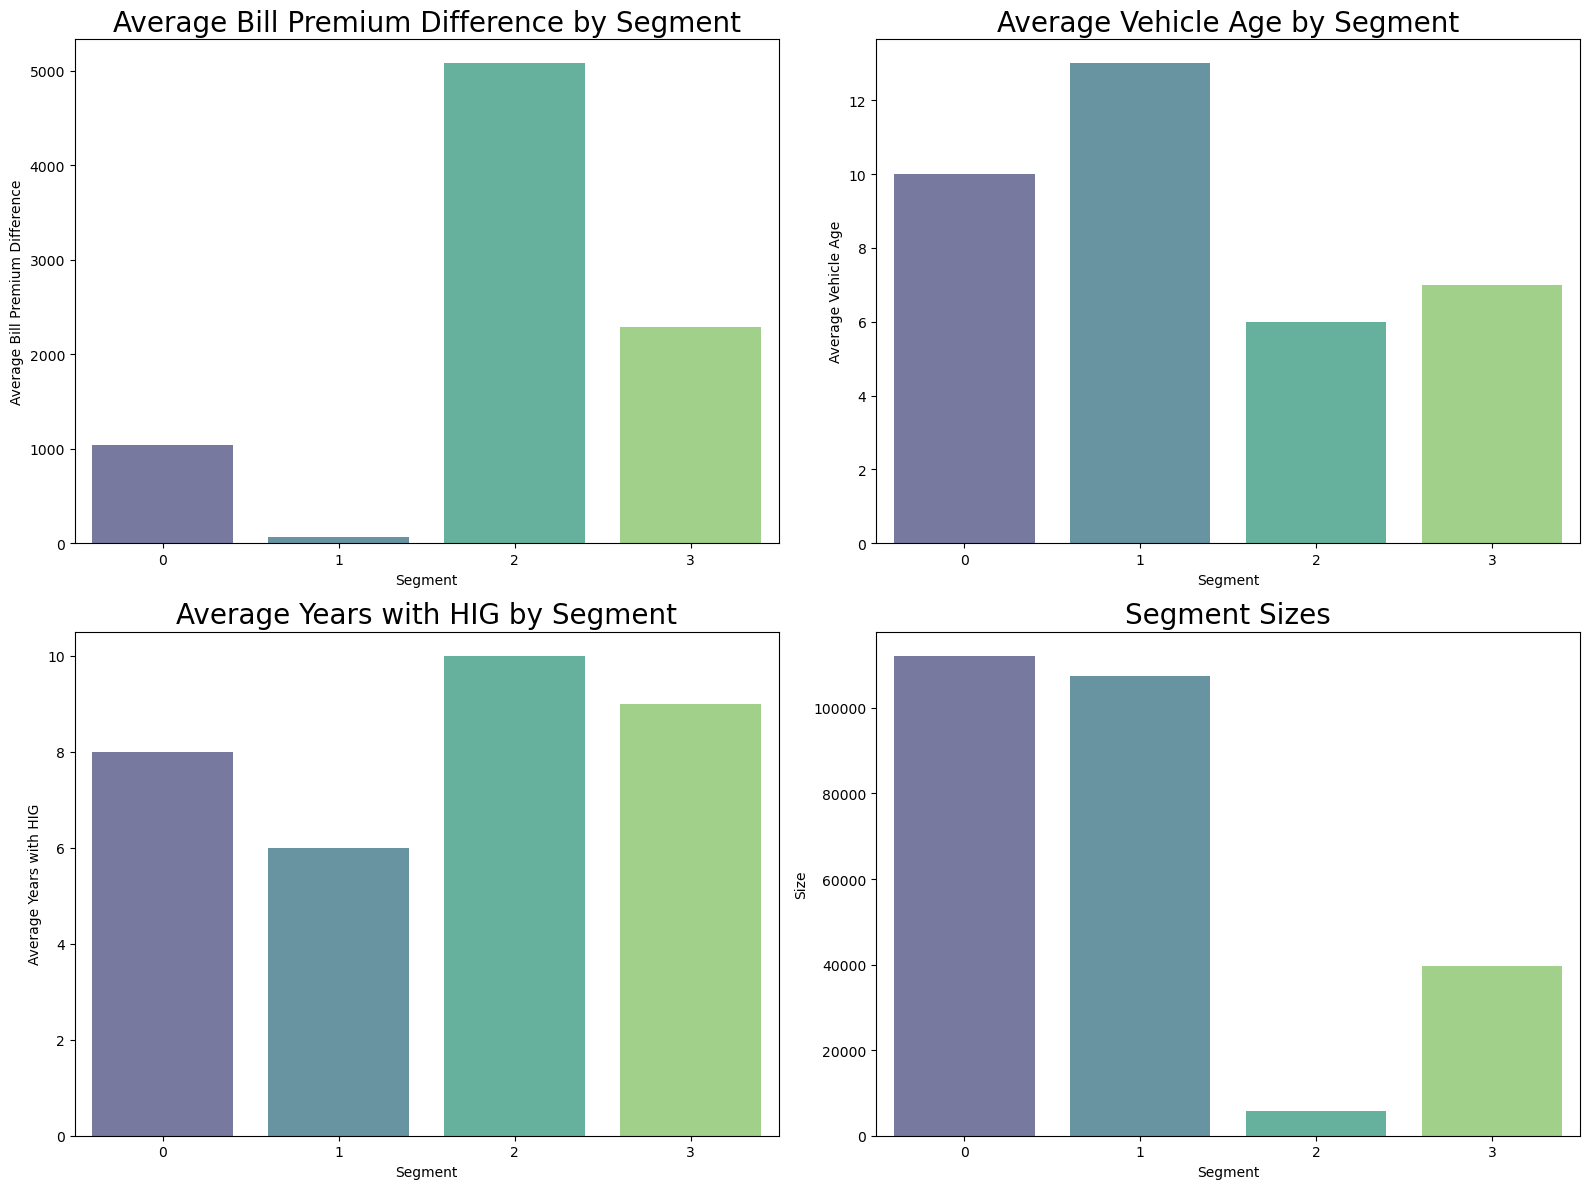

In [55]:
# Plot the average values of key features for each segment
plt.figure(figsize=(16, 12))

plt.subplot(2, 2, 1)
ax1 = sns.barplot(x='SEGMENT', y='BILL_PREM_DIFF', data=segment_summary, palette='viridis', alpha=0.75)
plt.title('Average Bill Premium Difference by Segment', fontsize = 20)
plt.xlabel('Segment')
plt.ylabel('Average Bill Premium Difference')


plt.subplot(2, 2, 2)
ax2 = sns.barplot(x='SEGMENT', y='VEHICLE_AGE', data=segment_summary, palette='viridis', alpha=0.75)
plt.title('Average Vehicle Age by Segment', fontsize = 20)
plt.xlabel('Segment')
plt.ylabel('Average Vehicle Age')


plt.subplot(2, 2, 3)
ax3 = sns.barplot(x='SEGMENT', y='YEARS_WITH_HIG', data=segment_summary, palette='viridis', alpha=0.75)
plt.title('Average Years with HIG by Segment', fontsize =20)
plt.xlabel('Segment')
plt.ylabel('Average Years with HIG')

    
plt.subplot(2, 2, 4)
ax4 = sns.barplot(x='SEGMENT', y='SIZE', data=segment_summary, palette='viridis', alpha=0.75)
plt.title('Segment Sizes', fontsize = 20)
plt.xlabel('Segment')
plt.ylabel('Size')


plt.tight_layout()
plt.show()
